<a href="https://colab.research.google.com/github/Auta01/Dev-nest-Internship/blob/main/pytorch%20workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt



In [4]:
torch.__version__

'2.9.0+cpu'

In [5]:
#Create known parameters
weight = 0.7

bias = 0.3

#create
start=0

end=1
step=0.002
X=torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]),
 tensor([[0.3000],
         [0.3014],
         [0.3028],
         [0.3042],
         [0.3056],
         [0.3070],
         [0.3084],
         [0.3098],
         [0.3112],
         [0.3126]]))

In [7]:
len(X), len(y)

(500, 500)

In [8]:
#Spliting the data into trai and test set
train_split =  int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

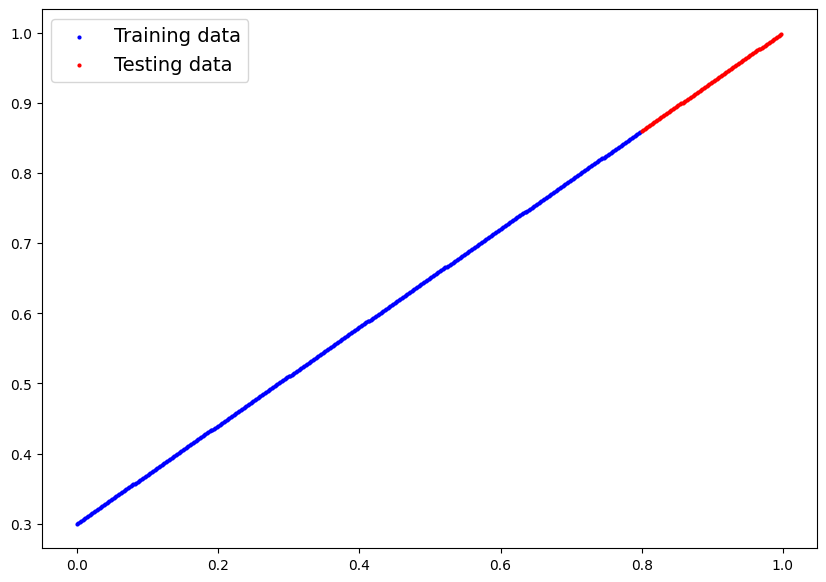

In [15]:
#Visualizing our data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b',s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='r', s=4, label='Testing data')


  if predictions is not None:
    plt.scatter(test_data, predictions, c='g',s=4, label='Predictions')
  plt.legend(prop={'size':14})
  plt.show()

# Call the function to plot the data
plot_predictions()

In [29]:
#Creating our model
#Create a linaer regeression

from torch  import nn

class LinearRegerssionModel(nn.Module): # almost everything inpytorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [33]:
#checking the contents of our pytorch model

#set a random seed

torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegerssionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
#list parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [38]:
#Making prediction with our torch.inference_model()

with torch.inference_mode():

  y_preds = model_0(X_test)

  y_preds

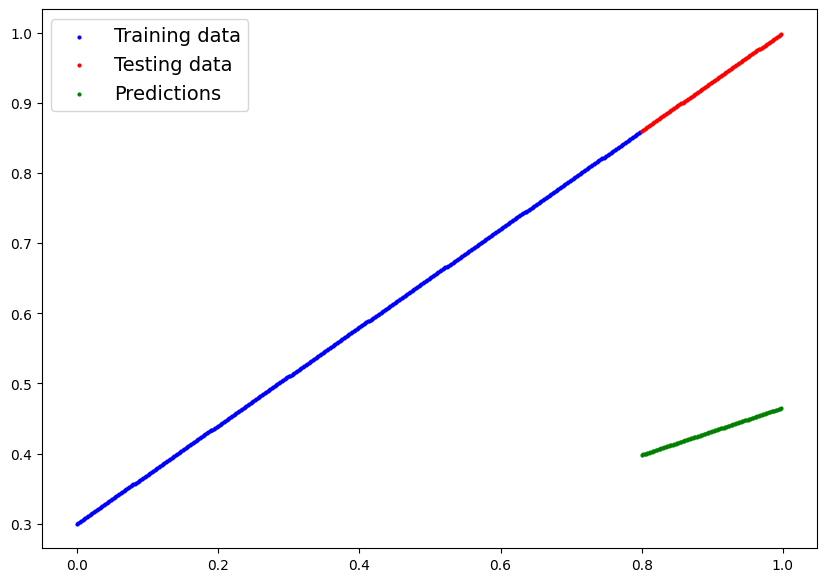

In [40]:
plot_predictions(predictions =y_preds)